In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from pyHYLC.fitting import datautils, plotutils

In [3]:
import importlib
RELOAD = lambda: [importlib.reload(m) for m in [datautils, plotutils]];

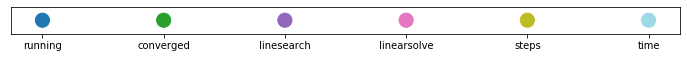

In [3]:
plotutils.plot_flags(cmap_flags='tab20')

In [4]:
RELOAD()
# folder = 'data_new/basket1'
# folder = 'data_new/honey1'
folder = 'data_new/rib1'
# folder = 'data_new/satin1'
# folder = 'data_new/stock1'
# folder = 'data/stockinette'
# folder = 'data/cartridge_belt_rib'
# folder = 'data/slip_stitch_honeycomb'
# folder = 'data/satin'
# folder = 'data/basket'
folder = 'data_reproduce/basket1'
dataarrays, block_info, area_density = datautils.read(folder)
(Xd, Yd, Fd, T) = dataarrays 
(n_per_1D, ixs_1D, blocks_1D, n_per_2D, ixs_2D, blocks_2D) = block_info

In [ ]:
plotutils.plot_data_1D(Xd, Yd, Fd, ixs_1D, blocks_1D, log=False, cmap_flags='tab20')

Padding data with flag '0'
Padding data with time '0'


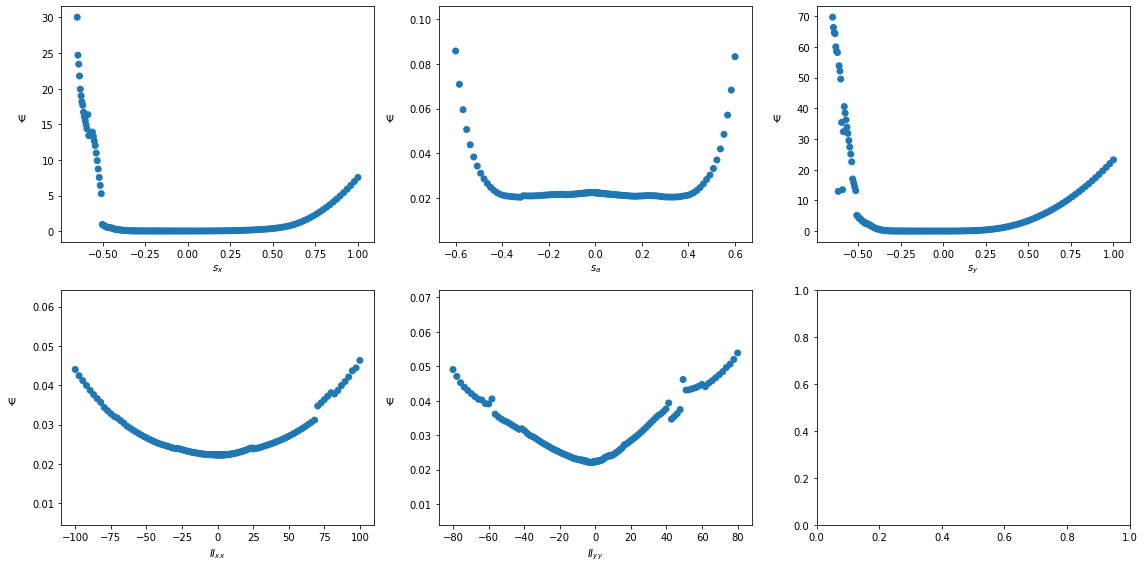

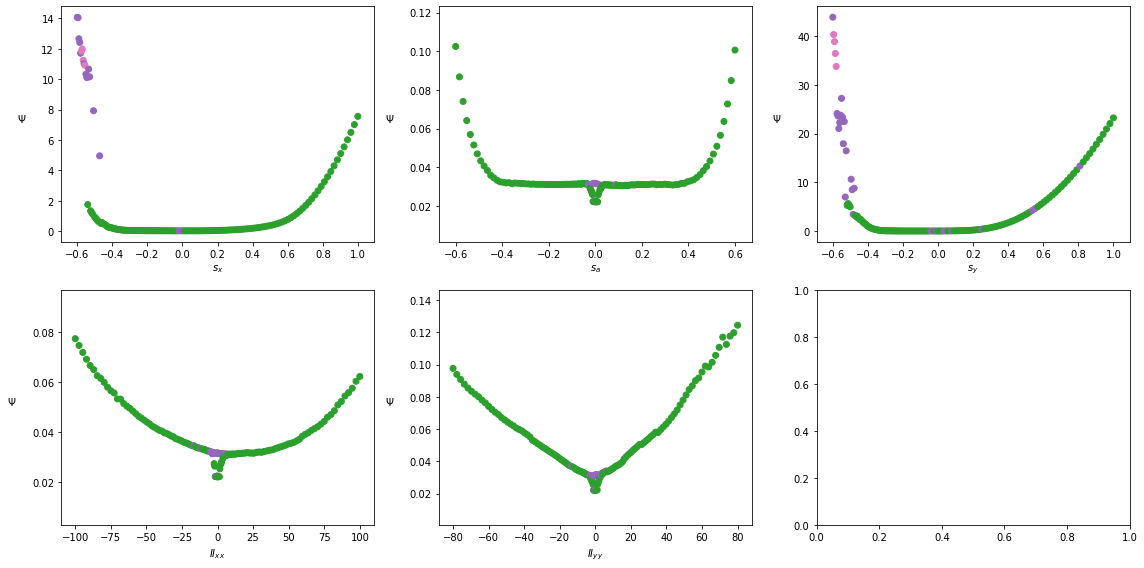

In [12]:
RELOAD()
# folder1,folder2 = 'data/stockinette', 'data_reproduce/stock1'           # pretty good except for compressive sy making second curve (cant reproduce manually)
folder1,folder2 = 'data/cartridge_belt_rib', 'data_reproduce/rib1'      # pretty bad
# folder1,folder2 = 'data/slip_stitch_honeycomb', 'data_reproduce/honey1' # pretty good except bending extrema have weird dropped plateus
# folder1,folder2 = 'data/satin', 'data_reproduce/satin1'                 # pretty amazing
# folder1,folder2 = 'data/basket', 'data_reproduce/basket1'                 # almost amazing some hickups in compression double curve
for folder in [folder1, folder2]:
    dataarrays, block_info, area_density = datautils.read(folder)
    (Xd, Yd, Fd, T) = dataarrays 
    (n_per_1D, ixs_1D, blocks_1D, n_per_2D, ixs_2D, blocks_2D) = block_info
    plotutils.plot_data_1D(Xd, Yd, Fd, ixs_1D, blocks_1D, log=False, cmap_flags='tab20')

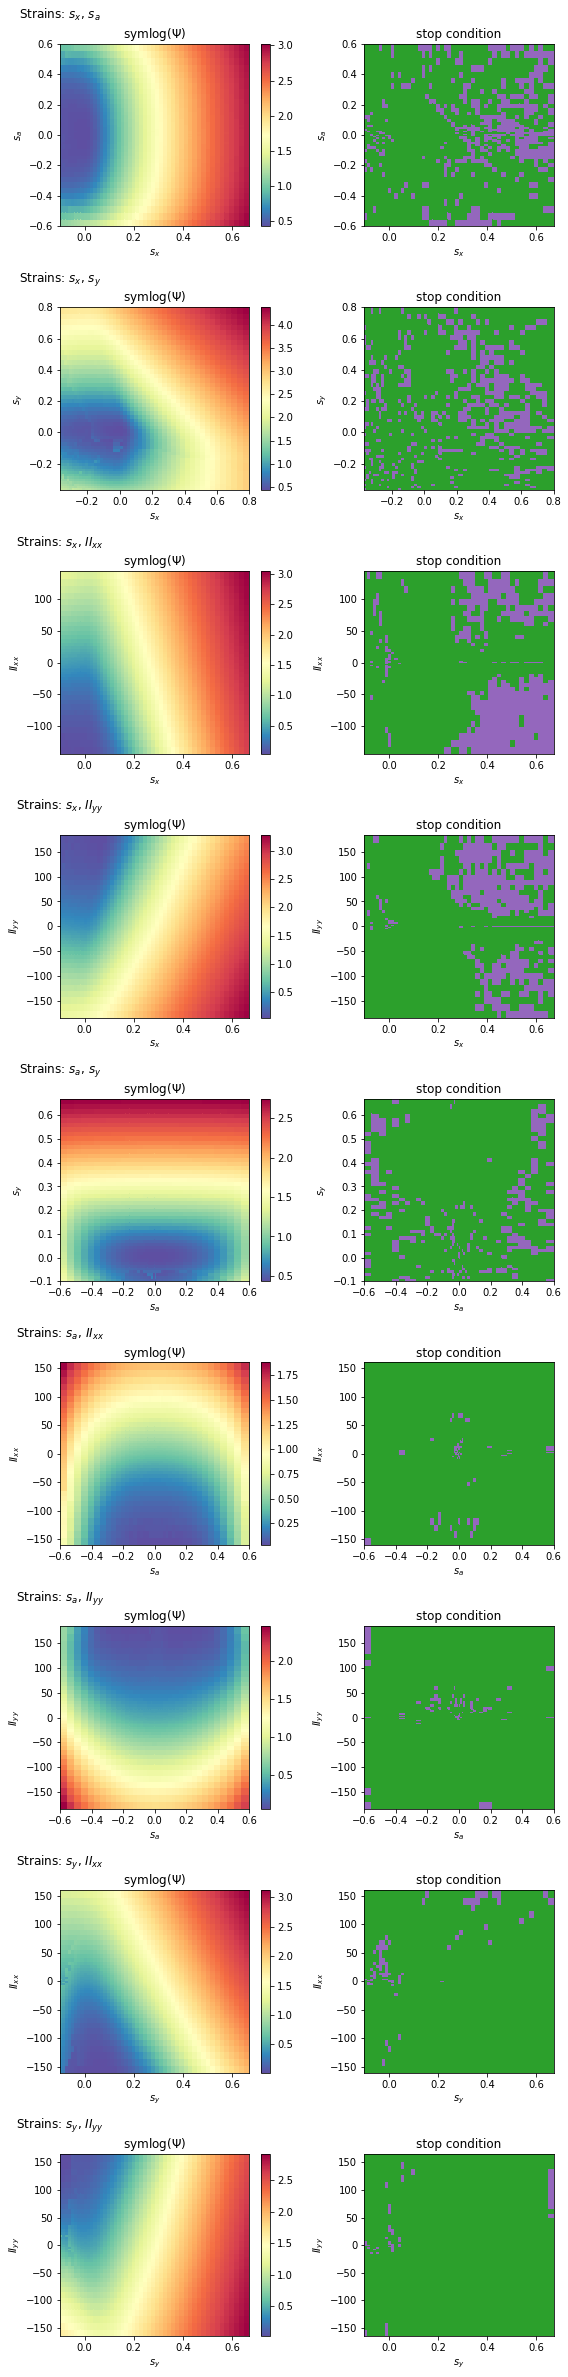

In [30]:
plotutils.plot_data_2D(Xd, Yd, Fd, int(np.sqrt(n_per_2D + 0.5)), ixs_2D, blocks_2D, log=True, cmap_flags='tab20')

In [22]:
import datetime

print("Print time per simulation. Note: not accounting for parallelism!")

t1 = 0
print("1D:")
for i in range(len(ixs_1D)):
    t_k = T[blocks_1D[i]].sum()
    print("      %d: %s (%d)" % (ixs_1D[i],str(datetime.timedelta(seconds=int(t_k))), len(T[blocks_1D[i]])))
    t1 += t_k
print("    all: %s" % (str(datetime.timedelta(seconds=int(t1)))))
t2 = 0
print("2D:")
for i in range(len(ixs_2D)):
    t_k = T[blocks_2D[i]].sum()
    print("    %d,%d: %s (%d)" % (ixs_2D[i][0],ixs_2D[i][1],str(datetime.timedelta(seconds=int(t_k))), len(T[blocks_2D[i]])))
    t2 += t_k
print("    all: %s" % (str(datetime.timedelta(seconds=int(t2)))))
print("Total: %s" % (str(datetime.timedelta(seconds=int(t1+t2)))))

Print time per simulation. Note: not accounting for parallelism!
1D:
      0: 0:04:24 (150)
      1: 0:03:55 (150)
      2: 0:02:31 (150)
      3: 0:03:57 (150)
      5: 0:04:32 (150)
    all: 0:19:21
2D:
    0,1: 0:24:44 (2500)
    0,2: 0:32:28 (2500)
    0,3: 1:24:22 (2500)
    0,5: 1:17:53 (2500)
    1,2: 0:20:22 (2500)
    1,3: 0:43:20 (2500)
    1,5: 0:50:40 (2500)
    2,3: 0:57:18 (2500)
    2,5: 0:58:37 (2500)
    all: 7:29:49
Total: 7:49:10
